show all data

In [ ]:
import pandas as pd

df = pd.read_csv("../data/global_air_quality_data_10000.csv")
data = df
print("ข้อมูลทั้งหมด:", df.shape)
print(df.head())


ข้อมูลทั้งหมด: (10000, 12)
             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  


In [10]:
data.sort_values(['City', 'Date'], inplace=True)
data.head(21)

NameError: name 'data' is not defined

select feature

In [6]:
features = [
    'PM10',
    'NO2',
    'SO2',
    'CO',
    'O3',
    'Temperature',
    'Humidity',
    'Wind Speed'
]

target = 'PM2.5'

X = df[features]
y = df[target]




In [8]:
df.sort_values(['City', 'Date'], inplace=True)
df.head(21)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
4589,Bangkok,Thailand,2023-01-01,130.50,135.42,10.63,9.58,4.81,42.17,-2.48,76.42,6.94
5948,Bangkok,Thailand,2023-01-01,146.15,17.85,8.16,26.30,6.47,32.08,-2.45,40.91,18.89
6767,Bangkok,Thailand,2023-01-01,104.65,129.93,87.44,46.85,7.19,134.22,22.43,28.17,15.70
1935,Bangkok,Thailand,2023-01-02,87.48,190.14,71.01,21.82,5.20,47.61,5.77,59.02,14.52
8619,Bangkok,Thailand,2023-01-02,122.48,140.38,99.60,33.16,1.91,163.06,38.72,68.47,7.16
1003,Bangkok,Thailand,2023-01-03,10.35,109.44,72.19,15.96,2.05,50.80,2.82,94.42,2.11
4157,Bangkok,Thailand,2023-01-03,46.66,12.14,49.40,2.97,3.01,169.44,-6.93,24.56,1.99
4895,Bangkok,Thailand,2023-01-03,63.42,48.95,19.46,16.75,6.83,132.83,19.62,68.51,8.99
5896,Bangkok,Thailand,2023-01-04,119.80,63.31,28.33,19.67,1.46,67.52,27.96,12.94,1.85
4668,Bangkok,Thailand,2023-01-05,95.64,192.46,37.28,46.64,8.50,159.19,14.02,91.29,2.49


CLEANING DATA

In [95]:
data = pd.concat([X, y], axis=1)

missing_data = 0
negative_data = 0
invalid_data = 0
outliers_data = 0

print("Missing values:\n", data.isnull().sum())

Missing values:
 PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
PM2.5          0
dtype: int64


In [96]:
before = data.shape[0]
data = data.dropna()
after = data.shape[0]
missing_data = before - after
print(f"ลบ Missing Values: {missing_data} แถว (เหลือ {after})")

ลบ Missing Values: 0 แถว (เหลือ 10000)


In [97]:
before = data.shape[0]
for col in data.columns:
    data = data[data[col] >= 0]
after = data.shape[0]
negative_data = before - after
print(f"ลบค่าติดลบ: {negative_data} แถว (เหลือ {after})")

ลบค่าติดลบ: 2043 แถว (เหลือ 7957)


In [100]:
before = data.shape[0]
data = data[data['PM2.5'] < 1000]
after = data.shape[0]
invalid_data = before - after
print(f"ลบ PM2.5 > 1000: {invalid_data} แถว (เหลือ {after})")

ลบ PM2.5 > 1000: 0 แถว (เหลือ 7957)


In [102]:
before = data.shape[0]
for col in data.columns:
    mean = data[col].mean()
    std = data[col].std()
    data = data[(data[col] >= mean - 3 * std) & (data[col] <= mean + 3 * std)]
after = data.shape[0]
outliers_data = before - after
print(f"ลบ outliers ±3σ: {outliers_data} แถว (เหลือ {after})")

ลบ outliers ±3σ: 0 แถว (เหลือ 7957)


In [103]:
X_cleaned = data[features]
y_cleaned = data[target]

In [104]:
print("สรุปการล้างข้อมูล:")
print(f"- Missing Values: {missing_data}")
print(f"- Negative Values: {negative_data}")
print(f"- Invalid PM2.5 > 1000: {invalid_data}")
print(f"- Outliers (3σ): {outliers_data}")
print(f"ข้อมูลสุดท้ายที่พร้อมใช้ = {X_cleaned.shape[0]} แถว")

สรุปการล้างข้อมูล:
- Missing Values: 0
- Negative Values: 2043
- Invalid PM2.5 > 1000: 0
- Outliers (3σ): 0
ข้อมูลสุดท้ายที่พร้อมใช้ = 7957 แถว


In [105]:
X_cleaned.head()

,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [106]:
y_cleaned.head()

0     86.57
1     50.63
2    130.21
3    119.70
4     55.20
Name: PM2.5, dtype: float64

NameError: name 'data' is not defined

train & test

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)


linear regression

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2 = r2_score(y_test, y_pred_dt)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 48.009020100502525
RMSE: 59.24034630979568
R² Score: -0.9877748302543377


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 36.514136371264065
RMSE: 42.067472194359816
R² Score: -0.002362573511204502


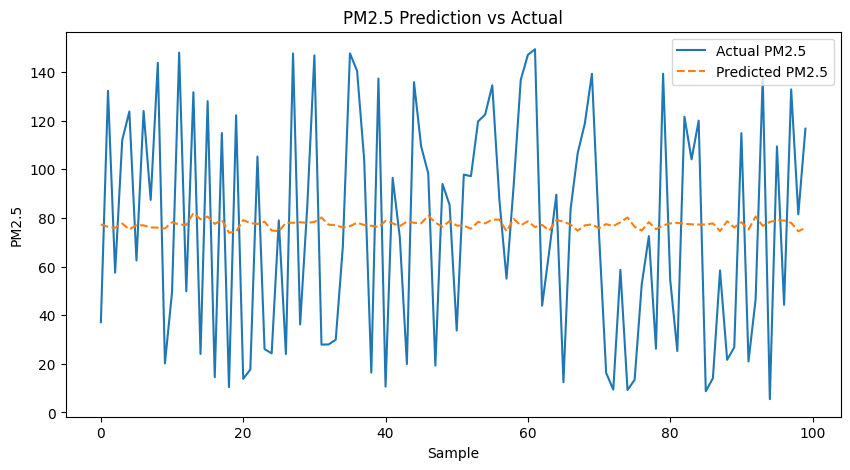

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label="Actual PM2.5")
plt.plot(y_pred_lr[:100], label="Predicted PM2.5", linestyle='-')
plt.legend()
plt.title("PM2.5 Prediction vs Actual")
plt.xlabel("Sample")
plt.ylabel("PM2.5")
plt.show()

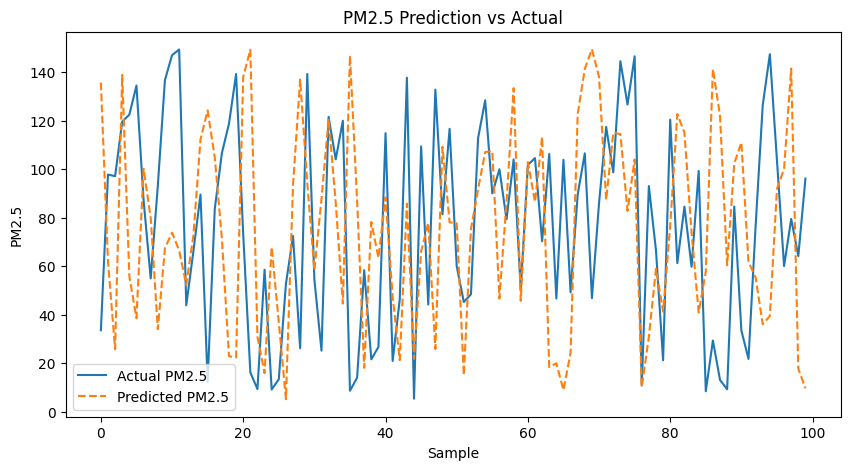

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[50:150], label="Actual PM2.5")
plt.plot(y_pred_dt[50:150], label="Predicted PM2.5", linestyle='--')
plt.legend()
plt.title("PM2.5 Prediction vs Actual")
plt.xlabel("Sample")
plt.ylabel("PM2.5")
plt.show()
